In [1]:
import cv2
import os
from utils import normalize
import numpy as np
import json
import matplotlib.pyplot as plt

dir_name ===> 9_12_4_multiscale
cls_name ===> pumkin
img_dir ===> V006_77_1_13_07_03_13_1_1044b_20201022_1137.jpg
804972
524 12 4232 2992
<class 'int'> <class 'int'> <class 'int'> <class 'int'>
804972


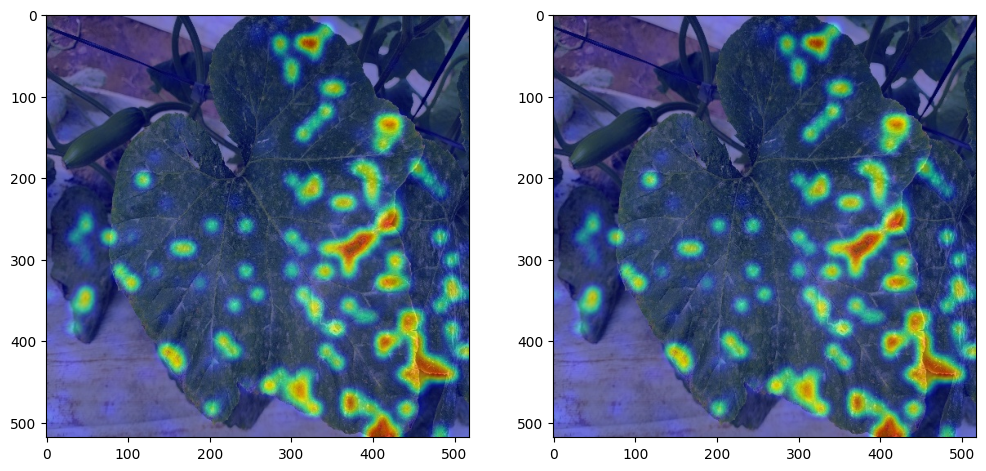

NameError: name 'sdvsd' is not defined

In [18]:
DIRNAMES = ['9_12_4_multiscale', '15_epopch']
CLSNAMES = ['pumkin','cucumber',  'sweet_pumkin']
for dir_name in DIRNAMES:
    print(f'dir_name ===> {dir_name}')
    for cls_name in CLSNAMES:
        print(f'cls_name ===> {cls_name}')
        result_dir = f'C:/Users/dmkwo/Documents/soo/AnomalyCLIP/results/0822_crop/{dir_name}/{cls_name}'
        img_dirs = os.listdir(f'{result_dir}/bad')

        for img_dir in img_dirs:
            print(f'img_dir ===> {img_dir}')
            plt.figure(figsize=(12, 8))
            plt.subplot(1, 2, 1)
            image = cv2.imread(os.path.join(result_dir, 'bad', img_dir))
            print(image.size)
            plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
            # plt.show()
            label_dir = f'C:/Users/dmkwo/Documents/soo/AnomalyCLIP/data/crop/{cls_name}/label/bad/{img_dir}.json'

            with open(label_dir, "r") as json_file:
                labels = json.load(json_file)

            for point in labels['annotations']['points']:
                xtl = point['xtl']
                ytl = point['ytl']
                xbr = xtl+point['xbr']
                ybr = ytl+point['ybr']  

            print(xtl, ytl, xbr, ybr)
            print(type(xtl), type(ytl), type(xbr), type(ybr))

            vis = cv2.rectangle(image, (xtl, ytl), (xbr, ybr), (255, 0, 255), 10)
            print(vis.size)
            plt.subplot(1, 2, 2)
            plt.imshow(cv2.cvtColor(vis, cv2.COLOR_BGR2RGB))
            plt.show()
            output_image_path = f'C:/Users/dmkwo/Documents/soo/AnomalyCLIP/results/0822_crop/{dir_name}/labels/{cls_name}'
            if not os.path.exists(output_image_path):
                os.makedirs(output_image_path)
            cv2.imwrite(os.path.join(output_image_path, img_dir), vis)
            sdvsd